In [1]:
#Blog=https://wordpress.com/view/furkanerguncansavruncs210.wordpress.com
import glob
from sklearn.linear_model import LinearRegression
import pandas as pd
import math
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import warnings 
warnings.simplefilter('ignore')

In [2]:
stocks = [f for f in glob.glob("Stocks/*.txt")]
#Gold dependent===>"Stocks/kgc.us.txt"
#Gold independent===>"Stocks/aamc.us.txt"
dataFrameList=[pd.read_csv(stocks[3])]
for i in range(len(dataFrameList)):
    dataFrameList[i]=dataFrameList[i].drop("OpenInt",axis=1)
    dataFrameList[i]["Date"]=pd.to_datetime(dataFrameList[i]["Date"])

In [3]:
goldDf=pd.read_csv("HistoricalQuotes _Gold.csv")
goldDf["date"]=pd.to_datetime(goldDf["date"])
goldDf.columns=["Date","Close","Volume","Open","High","Low"]
goldDf=goldDf.sort_values(by='Date', ascending=True)
goldDf=goldDf[dataFrameList[0].columns.tolist()]
goldDf=goldDf.reset_index(drop=True)

In [4]:
goldDf.head()

,Date,Open,High,Low,Close,Volume
0,2008-12-05,74.30,74.8100,72.91,74.520,13392230.0
1,2008-12-08,76.48,76.6200,75.40,76.195,7266957.0
2,2008-12-09,75.56,76.8500,75.30,76.330,9617588.0
3,2008-12-10,79.20,80.1099,78.56,79.750,16049730.0
4,2008-12-11,81.58,81.9400,80.49,80.650,13978800.0


In [5]:
dataFrameList[0].head()

,Date,Open,High,Low,Close,Volume
0,1996-04-12,1.05,1.79,1.02,1.38,408720000
1,1996-04-15,1.49,1.50,1.25,1.34,79231200
2,1996-04-16,1.34,1.34,1.17,1.20,48026400
3,1996-04-17,1.18,1.18,1.03,1.12,42871200
4,1996-04-18,1.25,1.25,1.17,1.22,27352800


In [6]:
print("The shape of gold data is:\n", goldDf.shape)
print("The shape of first stock data is:\n", dataFrameList[0].shape)
print()
print()
print("The type of gold data is:\n", goldDf.dtypes)
print("The type of first stock data is:\n", dataFrameList[0].dtypes)
print()
print()
print("The description of gold data is:\n", goldDf.describe())
print()
print()
print("The description of first stock data is:\n", dataFrameList[0].describe())

The shape of gold data is:
 (2517, 6)
The shape of first stock data is:
 (5434, 6)


The type of gold data is:
 Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object
The type of first stock data is:
 Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


The description of gold data is:
               Open         High          Low        Close        Volume
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03
mean    125.642665   126.242401   124.998518   125.640659  1.091762e+07
std      20.793875    20.882181    20.647774    20.785876  7.381535e+06
min      74.300000    74.810000    72.910000    74.520000  1.501552e+06
25%     113.960000   114.520000   113.550000   114.000000  6.272122e+06
50%     121.360000   121.880000   120.780000   121.310000 

# Does stock value of "a" increases with gold price
## Null hypothesis: Gold price is not relevant with stock price of the company

In [7]:
## Since the date interval of gold price is limited, stock value of company will be evaluated basis on the given date
def limitDates(firstDf, referenceDf):
    lastDate=referenceDf["Date"][0]
    firstDate=referenceDf["Date"][len(referenceDf)-1]
    if(firstDate>lastDate):
        firstDate, lastDate=lastDate, firstDate
    toBeReturn=firstDf[firstDf["Date"] >= firstDate]
    toBeReturn=toBeReturn[toBeReturn["Date"]<=lastDate]
    return toBeReturn

print(len(goldDf))
print(len(dataFrameList[0]))

2517
5434


In [8]:
for i in range(len(dataFrameList)):
    dataFrameList[i]=limitDates(dataFrameList[i],goldDf)
    dataFrameList[i]=dataFrameList[i].reset_index(drop=True)

goldDf=goldDf.reset_index(drop=True)
goldDf=limitDates(goldDf,dataFrameList[0])


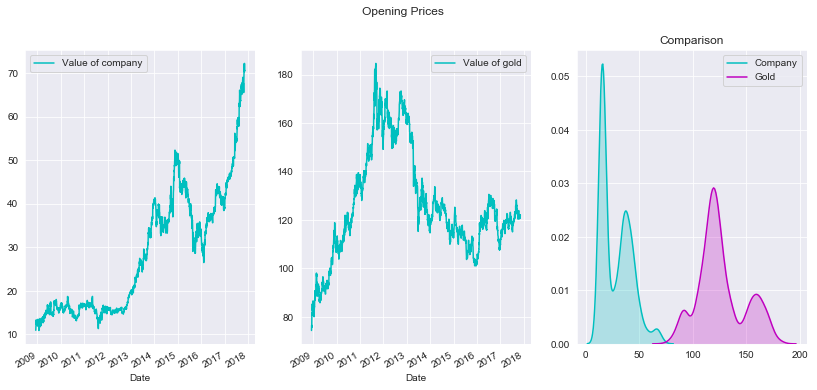

The pValue of Open price of both gold and company stock is:  0.0
The correlation coefficient of Open price of both gold and company stock is:  -0.255952910901108


In [9]:
fig, ax = plt.subplots(1, 3, figsize=(14,6)) 
dataFrameList[0].plot(x="Date",y="Open",ax=ax[0],color="c",label="Value of company")
goldDf.plot(x="Date",y="Open",ax=ax[1],color="c",label="Value of gold")
sns.kdeplot(dataFrameList[0]["Open"],shade=True, label="Company", ax=ax[2], color="c")
sns.kdeplot(goldDf["Open"], shade=True, label="Gold", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Opening Prices")
plt.show()

print("The pValue of Open price of both gold and company stock is: ", stats.ttest_ind(dataFrameList[0]["Open"], goldDf["Open"])[1])
print("The correlation coefficient of Open price of both gold and company stock is: ", goldDf['Open'].corr(dataFrameList[0]['Open']))
# –0.50. A moderate downhill (negative) relationship

Company Open Price vs Gold Open Price


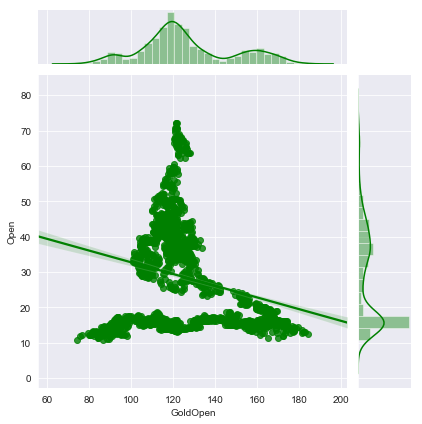

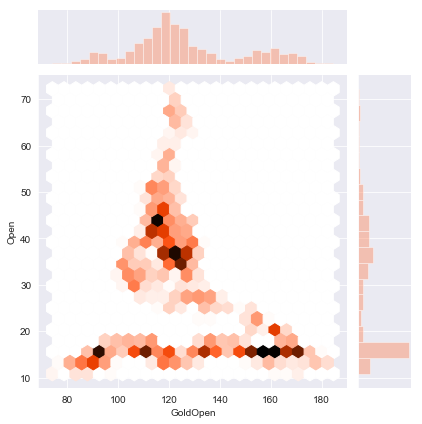

In [10]:
goldDf.columns=["Date","GoldOpen","GoldHigh","GoldLow","GoldClose","GoldVolume"]
joinedDf=pd.merge(goldDf, dataFrameList[0], on='Date', how='inner')

def getValue(time):
    return time.value
joinedDf["TimeValue"]=joinedDf["Date"].apply(getValue)


print("Company Open Price vs Gold Open Price")
graph=sns.jointplot(x=joinedDf.GoldOpen, y=joinedDf.Open, kind="reg",color='green')
graph=sns.jointplot(x=joinedDf.GoldOpen, y=joinedDf.Open, kind="hex",color='coral')


In [11]:
from sklearn.model_selection import train_test_split
lr=LinearRegression()

X=joinedDf[["GoldOpen","GoldHigh","GoldLow","GoldClose","GoldVolume"]]
y=joinedDf[["Open"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [12]:
lr.fit(X_train, y_train)
#lr.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Company Open Price=a1*GoldOpen+a2*GoldHigh+a3*GoldLow+a4*GoldClose+a5*GoldVolume+a6 which are

In [13]:
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][index]))
print("a6 is: ",lr.intercept_[0])

The coefficient for GoldOpen is 0.1158089104228153
The coefficient for GoldHigh is 0.8497577885436631
The coefficient for GoldLow is 0.8919184682791212
The coefficient for GoldClose is -1.9931229334312004
The coefficient for GoldVolume is -7.391138503421441e-07
a6 is:  53.99068847553944


In [14]:
print("The Score is: ",lr.score(X_test, y_test))

The Score is:  0.2606188146118471


In [15]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print("The mean squared error is: ",lr_mse)

The mean squared error is:  139.697009653121


In [16]:
df=dataFrameList[0]

## Preprocessing for machine learning

In [17]:
joinedDf=joinedDf.drop("TimeValue",axis=1)

In [18]:
joinedDf["GoldIncrease"]=joinedDf["GoldClose"]-joinedDf["GoldOpen"]
joinedDf["CompanyIncrease"]=joinedDf["Close"]-joinedDf["Open"]

In [19]:
def getPercent(df):
    return df[1]*100/df[0]

In [20]:
joinedDf.head()

,Date,GoldOpen,GoldHigh,GoldLow,GoldClose,GoldVolume,Open,High,Low,Close,Volume,GoldIncrease,CompanyIncrease
0,2008-12-05,74.30,74.8100,72.91,74.520,13392230.0,10.90,11.70,10.62,11.66,19853690,0.220,0.76
1,2008-12-08,76.48,76.6200,75.40,76.195,7266957.0,12.17,12.49,11.79,12.20,33027646,-0.285,0.03
2,2008-12-09,75.56,76.8500,75.30,76.330,9617588.0,11.99,12.54,11.77,12.19,28943158,0.770,0.20
3,2008-12-10,79.20,80.1099,78.56,79.750,16049730.0,12.69,13.57,12.35,13.40,46674720,0.550,0.71
4,2008-12-11,81.58,81.9400,80.49,80.650,13978800.0,13.28,13.36,12.57,12.73,26527148,-0.930,-0.55


In [21]:
joinedDf['GoldIncreaseRate'] = joinedDf[["GoldOpen","GoldIncrease"]].apply(getPercent,axis=1)
joinedDf['CompanyIncreaseRate'] = joinedDf[["Open", "CompanyIncrease"]].apply(getPercent, axis=1)

In [22]:
joinedDf=joinedDf[["Date","GoldIncrease","CompanyIncrease","GoldIncreaseRate","CompanyIncreaseRate"]]
joinedDf["GoldIncreaseorDecrease"] = 0 #5
#X=joinedDf[["GoldIncreaseBetween0and0.25","GoldIncreaseBetween0.25and0.5","GoldIncreaseBetween0.5and1","GoldIncreaseMoreThan1","GoldDecreaseBetween0and0.25","GoldDecreaseBetween0.25and0.5","GoldDecreaseBetween0.5and1","GoldDecreaseMoreThan1"]] 
joinedDf["CompanyIncreaseorDecrease"] = 0 # 13


In [23]:
joinedDf.head()

,Date,GoldIncrease,CompanyIncrease,GoldIncreaseRate,CompanyIncreaseRate,GoldIncreaseorDecrease,CompanyIncreaseorDecrease
0,2008-12-05,0.220,0.76,0.296097,6.972477,0,0
1,2008-12-08,-0.285,0.03,-0.372646,0.246508,0,0
2,2008-12-09,0.770,0.20,1.019058,1.668057,0,0
3,2008-12-10,0.550,0.71,0.694444,5.594957,0,0
4,2008-12-11,-0.930,-0.55,-1.139985,-4.141566,0,0


In [24]:
def getIncreaseDecrease(df):
    GoldIncrease=df[3]
    CompanyIncrease=df[4]
    x=0
    y=0
    if(0<GoldIncrease):
        df[5]=0
    else:
        df[5]=1
    
    #elif(0.25<GoldIncrease<0.5):
    #    df[5]=1
    #elif(0.5<GoldIncrease<1):
    #    df[5]=2
    #elif(GoldIncrease>1):
    #    df[5]=3
    #elif(-0.25<GoldIncrease<0):
    #    df[5]=4
    #elif(-0.5<GoldIncrease<-0.25):
    #    df[5]=5
    #elif(-1<GoldIncrease<-0.5):
    #    df[5]=6
    #elif(GoldIncrease<-1):
    #    df[5]=7
    
    if(0<CompanyIncrease):
        df[6]=0
    else:
        df[6]=1
    #elif(1<CompanyIncrease<2):
    #    df[6]=1
    #elif(2<CompanyIncrease<4):
    #    df[6]=2
    #elif(4<CompanyIncrease<6):
    #    df[6]=3
    #elif(6<CompanyIncrease):
    #    df[6]=4
    #elif(-1<CompanyIncrease<0):
    #    df[6]=5
    #elif(-2<CompanyIncrease<-1):
    #    df[6]=6
    #elif(-4<CompanyIncrease<-2):
    #    df[6]=7
    #elif(-6<CompanyIncrease<-4):
    #    df[6]=8
    #elif(CompanyIncrease<-6):
    #    df[6]=9
    
    return df
    

In [25]:
joinedDf=joinedDf.apply(getIncreaseDecrease,axis=1,result_type="broadcast")

In [26]:
joinedDf.head()

,Date,GoldIncrease,CompanyIncrease,GoldIncreaseRate,CompanyIncreaseRate,GoldIncreaseorDecrease,CompanyIncreaseorDecrease
0,2008-12-05 00:00:00,0.22,0.76,0.296097,6.97248,0,0
1,2008-12-08 00:00:00,-0.285,0.03,-0.372646,0.246508,1,0
2,2008-12-09 00:00:00,0.77,0.2,1.01906,1.66806,0,0
3,2008-12-10 00:00:00,0.55,0.71,0.694444,5.59496,0,0
4,2008-12-11 00:00:00,-0.93,-0.55,-1.13999,-4.14157,1,1


In [27]:
joinedDf.tail()

,Date,GoldIncrease,CompanyIncrease,GoldIncreaseRate,CompanyIncreaseRate,GoldIncreaseorDecrease,CompanyIncreaseorDecrease
2245,2017-11-06 00:00:00,0.93,1.44,0.770378,2.04924,0,0
2246,2017-11-07 00:00:00,-0.3,0.02,-0.246893,0.0277008,1,0
2247,2017-11-08 00:00:00,-0.32,-0.84,-0.262403,-1.16667,1,1
2248,2017-11-09 00:00:00,0.28,-0.27,0.229791,-0.383196,0,1
2249,2017-11-10 00:00:00,-0.86,-0.04,-0.704976,-0.0566572,1,1


## K neighbours

In [28]:
X=joinedDf[["GoldIncreaseorDecrease","GoldIncreaseRate"]]
X=X.astype('int')
y=joinedDf["CompanyIncreaseorDecrease"]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state = 41)
X_train, X_test, y_train, y_test=X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred = knn.predict(X_test)
# Checking the performance of the model with accuracy score;
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.514792899408284


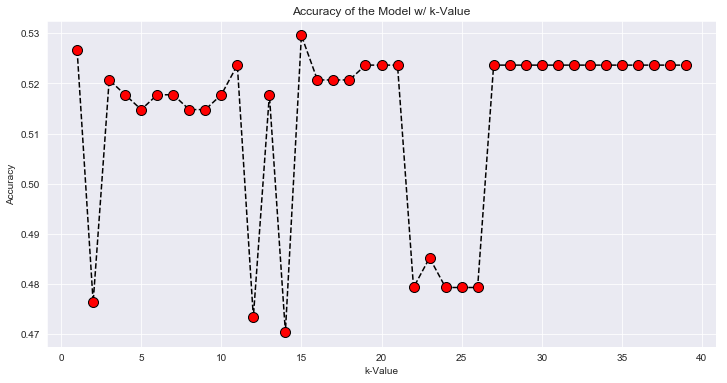

In [30]:
accuracy_list = []
for k in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

#### Ok the best k neighbour is 15

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state = 41)
X_train, X_test, y_train, y_test=X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)
neighBourNumber=15
knn = KNeighborsClassifier(n_neighbors=neighBourNumber)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy of the model with k = ",neighBourNumber,":",metrics.accuracy_score(y_test, y_pred))

lr_mse = mean_squared_error(y_pred, y_test)
print("The mean squared error is: ",lr_mse)

Accuracy of the model with k =  15 : 0.5295857988165681
The mean squared error is:  0.47041420118343197


## Random Forest

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("Accuracy of the random forest model: ",metrics.accuracy_score(y_test, pred_rf))

lr_mse = mean_squared_error(pred_rf, y_test)
print("The mean squared error is: ",lr_mse)

Accuracy of the random forest model:  0.4822485207100592
The mean squared error is:  0.5177514792899408


## Finding the optimal test size for our Random Forest

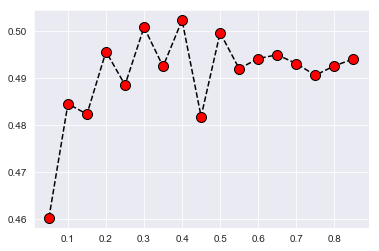

In [33]:
i=0.05
accuracy_list=[]
testsize_list=[]
while(i<0.9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i, random_state = 42)
    rf  = RandomForestClassifier(random_state = 42)
    rf.fit(X_train, y_train)

    pred_rf = rf.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, pred_rf))
    testsize_list.append(i)
    i+=0.05
plt.plot(testsize_list, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)

### As can be seen above, the random forest algorithm gives best accuracy with our dataset when the test_size is equal to 0.4

### Also it should be noted that there is not much difference between accuracy when the test size is in 0.2<testSize<1 interval

In [34]:
# With test_size=0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state = 42)
rf  = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("Accuracy of the random forest model: ",metrics.accuracy_score(y_test, pred_rf))

lr_mse = mean_squared_error(pred_rf, y_test)
print("The mean squared error is: ",lr_mse)

Accuracy of the random forest model:  0.5022222222222222
The mean squared error is:  0.49777777777777776


## Below here is the low accuracy model which builds upon the factor of the increase rate

In [35]:
def getIncreaseDecrease(df):
    GoldIncrease=df[3]
    CompanyIncrease=df[4]
    x=0
    y=0
    if(0<GoldIncrease<0.25):
        df[5]=0
    #else:
        #df[5]=1
    
    elif(0.25<GoldIncrease<0.5):
        df[5]=1
    elif(0.5<GoldIncrease<1):
        df[5]=2
    elif(GoldIncrease>1):
        df[5]=3
    elif(-0.25<GoldIncrease<0):
        df[5]=4
    elif(-0.5<GoldIncrease<-0.25):
        df[5]=5
    elif(-1<GoldIncrease<-0.5):
        df[5]=6
    elif(GoldIncrease<-1):
        df[5]=7
    
    if(0<CompanyIncrease<1):
        df[6]=0
    #else:
        #df[6]=1
    elif(1<CompanyIncrease<2):
        df[6]=1
    elif(2<CompanyIncrease<4):
        df[6]=2
    elif(4<CompanyIncrease<6):
        df[6]=3
    elif(6<CompanyIncrease):
        df[6]=4
    elif(-1<CompanyIncrease<0):
        df[6]=5
    elif(-2<CompanyIncrease<-1):
        df[6]=6
    elif(-4<CompanyIncrease<-2):
        df[6]=7
    elif(-6<CompanyIncrease<-4):
        df[6]=8
    elif(CompanyIncrease<-6):
        df[6]=9
    
    return df
  

In [36]:
unsuccesfullModel=joinedDf=joinedDf.apply(getIncreaseDecrease,axis=1,result_type="broadcast")

In [37]:
X=unsuccesfullModel[["GoldIncreaseorDecrease","GoldIncreaseRate"]]
X=X.astype('int')
y=unsuccesfullModel["CompanyIncreaseorDecrease"]
y=y.astype('int')

## K Neighbours

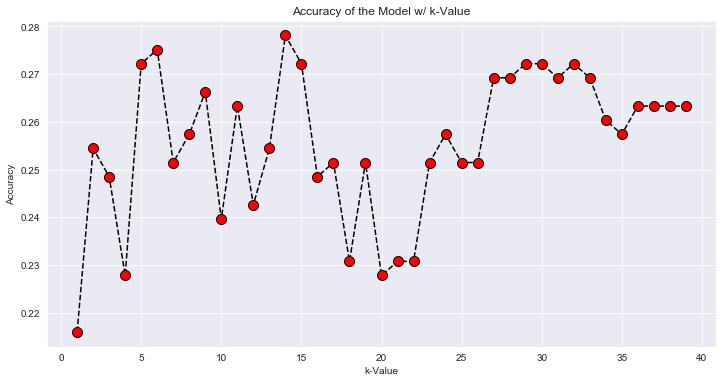

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state = 41)
X_train, X_test, y_train, y_test=X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)

accuracy_list = []
for k in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

### Best k is 14

In [39]:
neighBourNumber=14
knn = KNeighborsClassifier(n_neighbors=neighBourNumber)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy of the model with k = ",neighBourNumber,":",metrics.accuracy_score(y_test, y_pred))

lr_mse = mean_squared_error(y_pred, y_test)
print("The mean squared error is: ",lr_mse)

Accuracy of the model with k =  14 : 0.2781065088757396
The mean squared error is:  11.940828402366863


## Random Forest

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state = 42)
rf  = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("Accuracy of the random forest model: ",metrics.accuracy_score(y_test, pred_rf))

lr_mse = mean_squared_error(pred_rf, y_test)
print("The mean squared error is: ",lr_mse)

Accuracy of the random forest model:  0.257396449704142
The mean squared error is:  14.562130177514794
